In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv(r'D:\NAM 3\Ki II\Đồ án II\dataset\du_lieu_da_xu_ly (1).csv', encoding='utf-8')

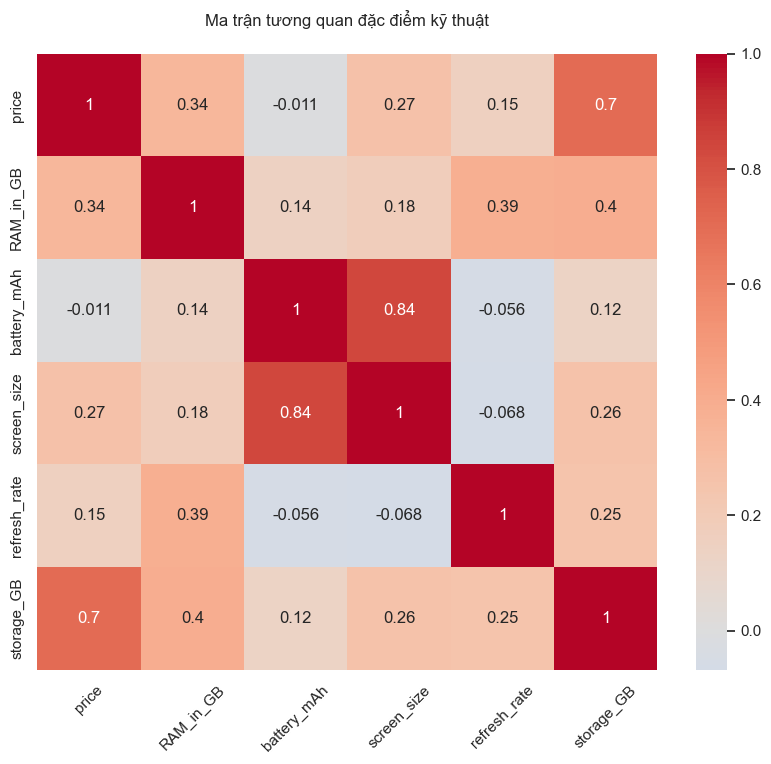

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Thiết lập giao diện đồ họa bằng seaborn
sns.set_theme(style="whitegrid", palette="husl")

# 1. Phân tích tương quan đa biến
numeric_cols = ['price', 'RAM_in_GB', 'battery_mAh', 'screen_size', 'refresh_rate','storage_GB']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Ma trận tương quan đặc điểm kỹ thuật', pad=20)
plt.xticks(rotation=45)
plt.show()

In [14]:
df.head

<bound method NDFrame.head of                                          title     price  ratings  num_rates  \
0                  ASUS ROG Phone 6 12GB 256GB  14490000      5.0         20   
1                          BENCO V91 4GB 128GB   2690000      5.0          1   
2                       Benco S1 Pro 8GB 256GB   4290000      5.0         10   
3                                 INOI 288S 4G   1000000      5.0          1   
4                      INOI Note 13s 8GB 256GB   2790000      5.0          2   
..                                         ...       ...      ...        ...   
278                  Xiaomi 14T Pro 12GB 512GB  14490000      4.9         50   
279             Xiaomi Redmi Note 14 6GB 128GB   4690000      4.8         93   
280                    Xiaomi 15 5G 12GB 256GB  21990000      4.8          6   
281        Samsung Galaxy S25 Ultra 12GB 256GB  28990000      4.8         26   
282  iPhone 16 Pro Max 256GB | Chính hãng VN/A  30990000      4.9        233   

     scre

C:\Users\Asus-FPT\AppData\Local\Temp\ipykernel_31032\3129776919.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_battery_by_brand.values, y=avg_battery_by_brand.index, palette="viridis")


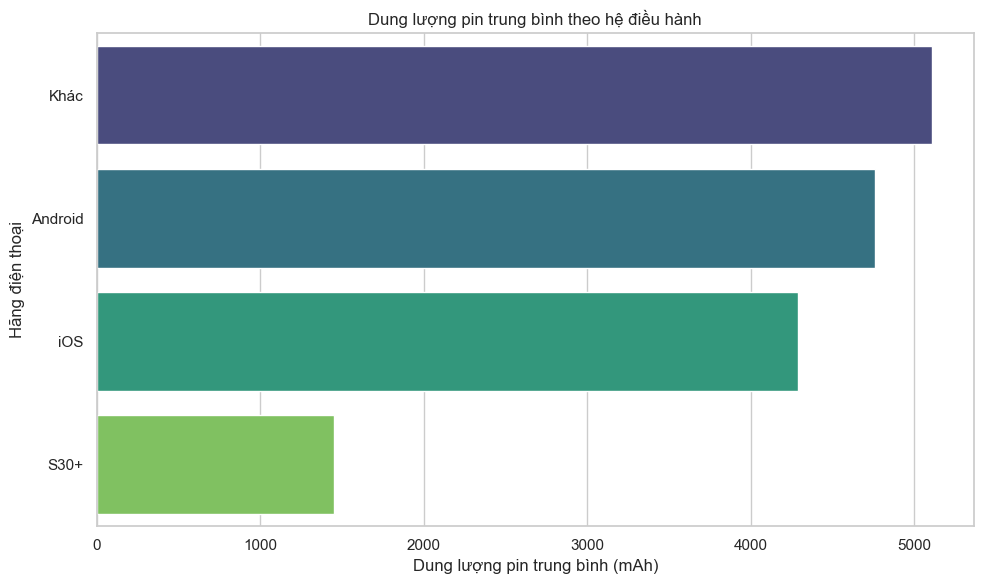

operating_system
Khác       5108.333333
Android    4757.977778
iOS        4286.000000
S30+       1450.000000
Name: battery_mAh, dtype: float64

In [26]:
# Tách hãng từ cột "title" (giả sử hãng là từ đầu tiên trước dấu cách)
# df["brand"] = df["title"].str.split().str[0]

# Tính trung bình mức pin của mỗi hãng
avg_battery_by_brand = df.groupby("operating_system")["battery_mAh"].mean().sort_values(ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_battery_by_brand.values, y=avg_battery_by_brand.index, palette="viridis")
plt.xlabel("Dung lượng pin trung bình (mAh)")
plt.ylabel("Hãng điện thoại")
plt.title("Dung lượng pin trung bình theo hệ điều hành")
plt.tight_layout()
plt.show()

avg_battery_by_brand


In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score
# Xử lý cột 'RAM_in_GB' nếu có kiểu dữ liệu không đúng
df["RAM_in_GB"] = pd.to_numeric(df["RAM_in_GB"], errors="coerce")

# Chọn các đặc trưng và biến mục tiêu
features = ['ratings', 'num_rates', 'screen_size', 'refresh_rate',
            'internal_storage', 'battery', 'RAM_in_GB',
            'chipset', 'GPU', 'sim_slot', 'operating_system']
target = 'price'

# Mã hóa các biến phân loại
label_encoders = {}
for col in ['chipset', 'GPU', 'sim_slot', 'operating_system']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Loại bỏ dòng có giá trị thiếu
df = df.dropna(subset=features + [target])

# Tách dữ liệu
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)

# Đánh giá mô hình
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:,.0f}")
print(f"R² Score: {r2:.2f}")

MAE: 2,743,577
R² Score: 0.88


C:\Users\Asus-FPT\AppData\Local\Temp\ipykernel_31032\1227952036.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_battery_by_brand.values, y=avg_battery_by_brand.index, palette="viridis")


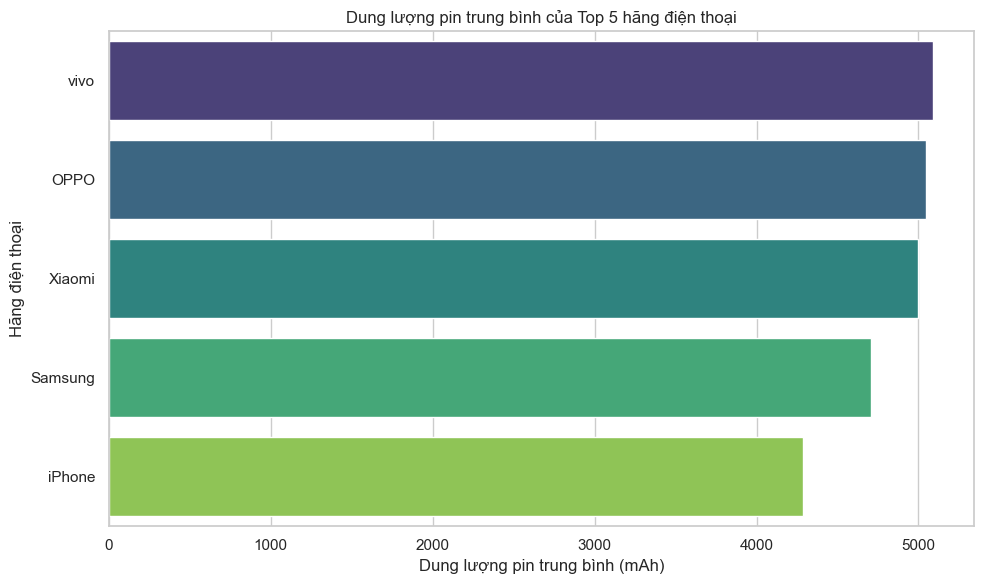

brand
vivo       5088.235294
OPPO       5049.400000
Xiaomi     4999.428571
Samsung    4707.812500
iPhone     4286.000000
Name: battery_mAh, dtype: float64

In [27]:
# Thêm cột 'brand' bằng cách lấy từ đầu tiên trong 'title'
df['brand'] = df['title'].apply(lambda x: x.split()[0])

# Lọc ra top 5 hãng có nhiều sản phẩm nhất
top_5_brands = df['brand'].value_counts().head(5).index

# Lọc dữ liệu theo top 5 hãng
df_top5 = df[df['brand'].isin(top_5_brands)]

# Tính trung bình dung lượng pin theo hãng
avg_battery_by_brand = df_top5.groupby("brand")["battery_mAh"].mean().sort_values(ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_battery_by_brand.values, y=avg_battery_by_brand.index, palette="viridis")
plt.xlabel("Dung lượng pin trung bình (mAh)")
plt.ylabel("Hãng điện thoại")
plt.title("Dung lượng pin trung bình của Top 5 hãng điện thoại")
plt.tight_layout()
plt.show()

# Hiển thị kết quả trung bình
avg_battery_by_brand

chạy lazylazy